# Exploring marriages and divorces in Jamaica

Data from The Statistical Institute of Jamaica

First importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sb

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from pandas import DataFrame as df
import requests
from bs4 import BeautifulSoup

Getting data from the STATIN website

In [2]:
response = requests.get("https://www.datazoa.com/data/table.asp?a=view&th=2742AB0EE8&dzuuid=1838&uid=dzadmin")
content = response.content
soup = BeautifulSoup(content, 'html.parser')
results = soup.find(class_ = 'dz-embed')
content = results.find_all('span')
content

[<span class="DZValue">18,835</span>,
 <span class="DZValue">18,699</span>,
 <span class="DZValue">18,323</span>,
 <span class="DZValue">17,609</span>,
 <span class="DZValue">17,411</span>,
 <span class="DZValue">16,719</span>,
 <span class="DZValue">39.0</span>,
 <span class="DZValue">39.0</span>,
 <span class="DZValue">34.0</span>,
 <span class="DZValue">25.0</span>,
 <span class="DZValue">31.0</span>,
 <span class="DZValue">20.0</span>,
 <span class="DZValue">4,905</span>,
 <span class="DZValue">4,780</span>,
 <span class="DZValue">4,531</span>,
 <span class="DZValue">4,277</span>,
 <span class="DZValue">4,219</span>,
 <span class="DZValue">3,958</span>,
 <span class="DZValue">6,877</span>,
 <span class="DZValue">6,845</span>,
 <span class="DZValue">6,614</span>,
 <span class="DZValue">6,157</span>,
 <span class="DZValue">5,923</span>,
 <span class="DZValue">5,685</span>,
 <span class="DZValue">4,033</span>,
 <span class="DZValue">4,138</span>,
 <span class="DZValue">4,087</span>,
 

Cleaning the data

In [12]:
clean_data = ""
x = 0
frame = []
for data in content[:-16]:
    clean_data += data.text.strip() + '|'
    clean_data = clean_data.replace(",", "")
    clean_data = clean_data.replace(".0", "")
    x += 1
    if x == 6:
        frame.append(list(map(int,clean_data.split('|')[:-1])))
        #frame.append(clean_data.split('|')[:-1])
        clean_data = ""
        x = 0


frame

[[18835, 18699, 18323, 17609, 17411, 16719],
 [39, 39, 34, 25, 31, 20],
 [4905, 4780, 4531, 4277, 4219, 3958],
 [6877, 6845, 6614, 6157, 5923, 5685],
 [4033, 4138, 4087, 3989, 3927, 3738],
 [2113, 2035, 2124, 2214, 2236, 2328],
 [868, 862, 933, 947, 1075, 990],
 [18835, 18699, 18319, 17609, 17411, 16719],
 [188, 176, 190, 133, 139, 120],
 [6596, 6489, 6150, 5738, 5549, 5192],
 [6615, 6532, 6467, 6127, 5845, 5622],
 [3580, 3647, 3564, 3558, 3659, 3515],
 [1514, 1489, 1586, 1621, 1737, 1793],
 [392, 366, 362, 432, 482, 477]]

Great, now to split up, label and put into a Pandas DataFrame

In [98]:
males = frame[0:7]
females = frame[7:]
columns = [x for x in range(2013,2019)]
arr = np.array(males + females)

side = ['Total', 'Under_20', '20-29', '30-39', '40-49', '50-59', '60_and_over']
data = df(arr, columns=columns, index=side+side)
data



,2013,2014,2015,2016,2017,2018
Total,18835,18699,18323,17609,17411,16719
Under_20,39,39,34,25,31,20
20-29,4905,4780,4531,4277,4219,3958
30-39,6877,6845,6614,6157,5923,5685
40-49,4033,4138,4087,3989,3927,3738
50-59,2113,2035,2124,2214,2236,2328
60_and_over,868,862,933,947,1075,990
Total,18835,18699,18319,17609,17411,16719
Under_20,188,176,190,133,139,120
20-29,6596,6489,6150,5738,5549,5192


Time to have some fun with the numbers

<AxesSubplot:>

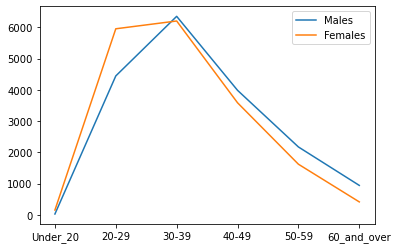

In [118]:
males = data.loc[data[2013] < 18000].head(6)
males

females = data.loc[data[2013] < 18000].tail(6)
females

males['mean'] = males.mean(axis=1)
males
females['mean'] = females.mean(axis=1)

cross = pd.concat([males['mean'], females['mean']], axis=1, keys=['Males', 'Females'])
cross.plot()